<a href="https://colab.research.google.com/github/Suprita1801/Data-Science/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    #clone YOLOV5 repository
!git clone https://github.com/ultralytics/yolov5.git #clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17428, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 17428 (delta 71), reused 27 (delta 27), pack-reused 17329 (from 2)
Receiving objects: 100% (17428/17428), 16.30 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (11948/11948), done.
/content/yolov5


In [ ]:
!pwd # present working directory

/content/yolov5


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_

CUSTOM DATA

In [ ]:
!pwd

/content/yolov5


In [ ]:
#export code snippet and paste here
%cd /content
!curl -L"https://github.com/Hamsa2510/dataset/raw/refs/heads/main/YOLOV5.v1i.yolov5pytorch.zip" > SignData.zip; unzip SignData.zip; rm SignData.zip


/content
Archive:  SignData.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of SignData.zip or
        SignData.zip.zip, and cannot find SignData.zip.ZIP, period.


In [ ]:
!unzip /content/YOLOV5.v1i.yolov5pytorch.zip


Archive:  /content/YOLOV5.v1i.yolov5pytorch.zip
error [/content/YOLOV5.v1i.yolov5pytorch.zip]:  missing 2097152 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
# This is the YAML file we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../test/images

nc: 5
names: ['Just a bit', 'Over there', 'Thank you', 'Wash your hands', 'okay']

roboflow:
  workspace: ieee-3dsm5
  project: yolov5-obrhk
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/ieee-3dsm5/yolov5-obrhk/dataset/1

Define Model Configuration and Architecture:

we will write a yaml script that defines the parameters for our model like the number of classes,anchors,and each layer.



In [ ]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'5'

In [ ]:
# this is the model configuration we will use
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [ ]:
# customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:

%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Train Custom YOLOV5 Detector:

img: define input image size

batch: determine batch size

epochs: define the number of training epochs(3000+ are common here)

data: set the path to our yaml file

cfg: specify our model configuration

weights: specify a custom path to weights(downloading weights from the ultralytics google drive)

name:result names

nosave :only save the final checkpoints

cache:cache images for faster training


In [ ]:
data ='/content/data.yaml'

In [ ]:
# train yolov5 on custom data for 100 epochs
#time its performance
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 100 --data '/content/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache



/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-21 13:00:59.015265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745240459.319384    6883 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745240459.394931    6883 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

In [ ]:
!find runs/train/ -name "*.pt"


runs/train/yolov5s_results/weights/last.pt
runs/train/yolov5s_results/weights/best.pt


Evaluate Custom YOLOv5 Detector Performance:

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the --name flag when we train. In our case, we named this yolov5s_results. (If given no name, it defaults to results.txt.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed results.txt files can be plotted with from utils.utils import plot_results; plot_results().

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs


<IPython.core.display.Javascript object>

In [ ]:
!nvidia-smi

Mon Apr 21 06:37:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!ls -R /content/yolov5/runs/train/



/content/yolov5/runs/train/:
yolov5s_results

/content/yolov5/runs/train/yolov5s_results:
confusion_matrix.png				    R_curve.png
events.out.tfevents.1745217079.5b543ddc1fb1.2666.0  results.csv
F1_curve.png					    results.png
hyp.yaml					    train_batch0.jpg
labels_correlogram.jpg				    train_batch1.jpg
labels.jpg					    train_batch2.jpg
opt.yaml					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights

/content/yolov5/runs/train/yolov5s_results/weights:
best.pt  last.pt


In [ ]:
#plot_results("/content/yolov5/runs/train/yolov5s_results3/results.csv")  # Manually specify path


NameError: name 'plot_results' is not defined

In [ ]:
#!find /content/yolov5/runs/train/ -name "results.png" #(optional when your result.png is not saved so you can convert result.csv to png )


/content/yolov5/runs/train/yolov5s_results3/results.png


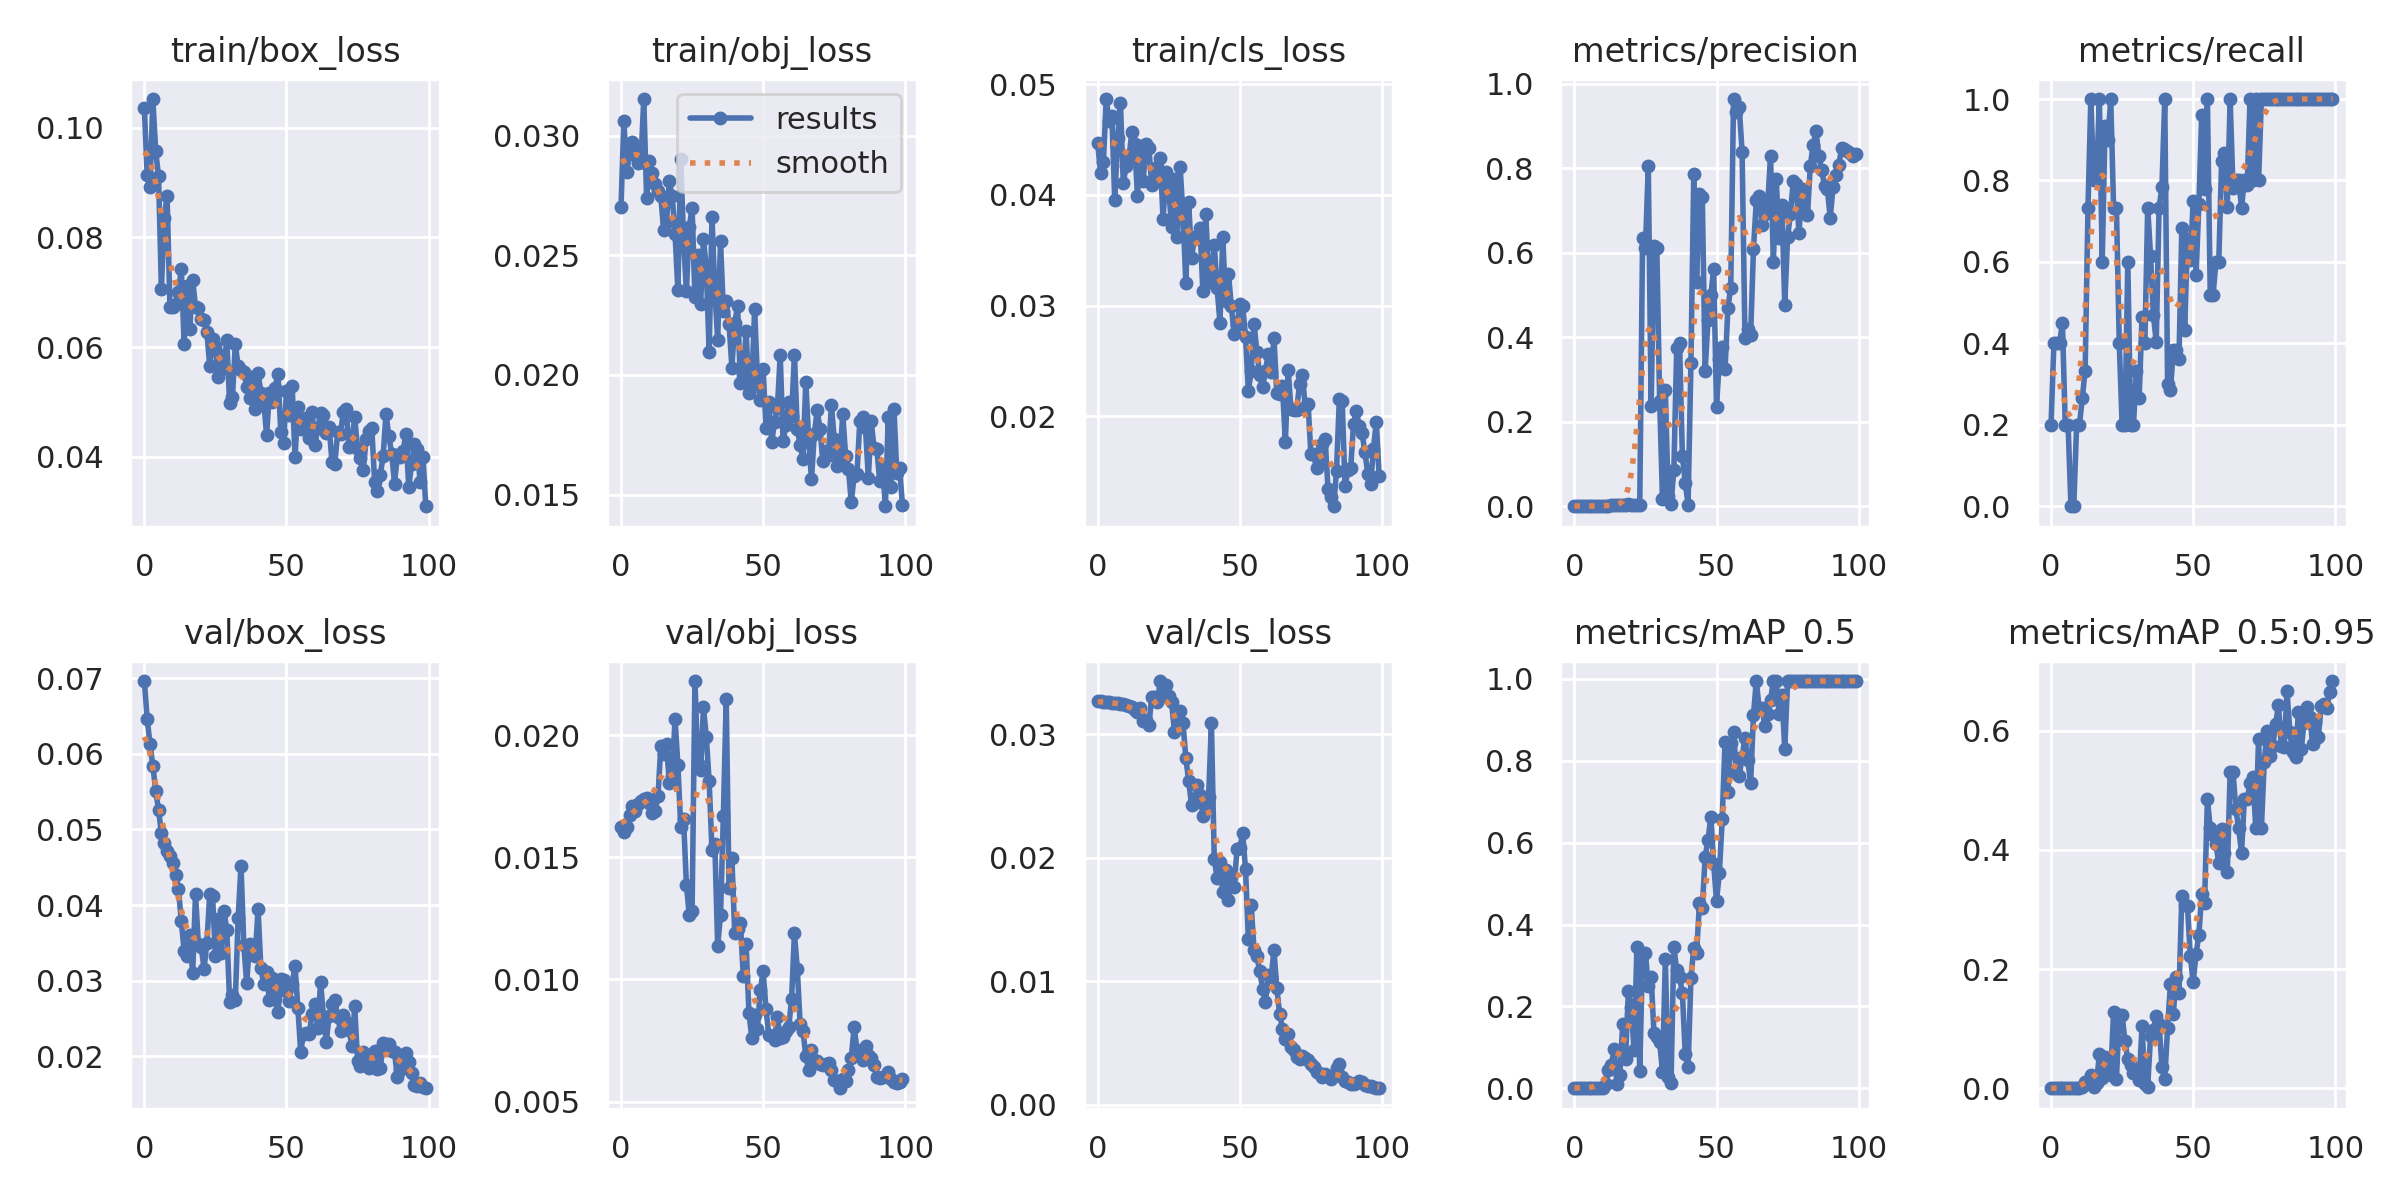

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason...
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png


In [ ]:
!find /content/yolov5/runs/train/ -name "val_batch0_labels.jpg"


/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg


In [ ]:
#!ls /content/yolov5/runs/train/yolov5s_results3/


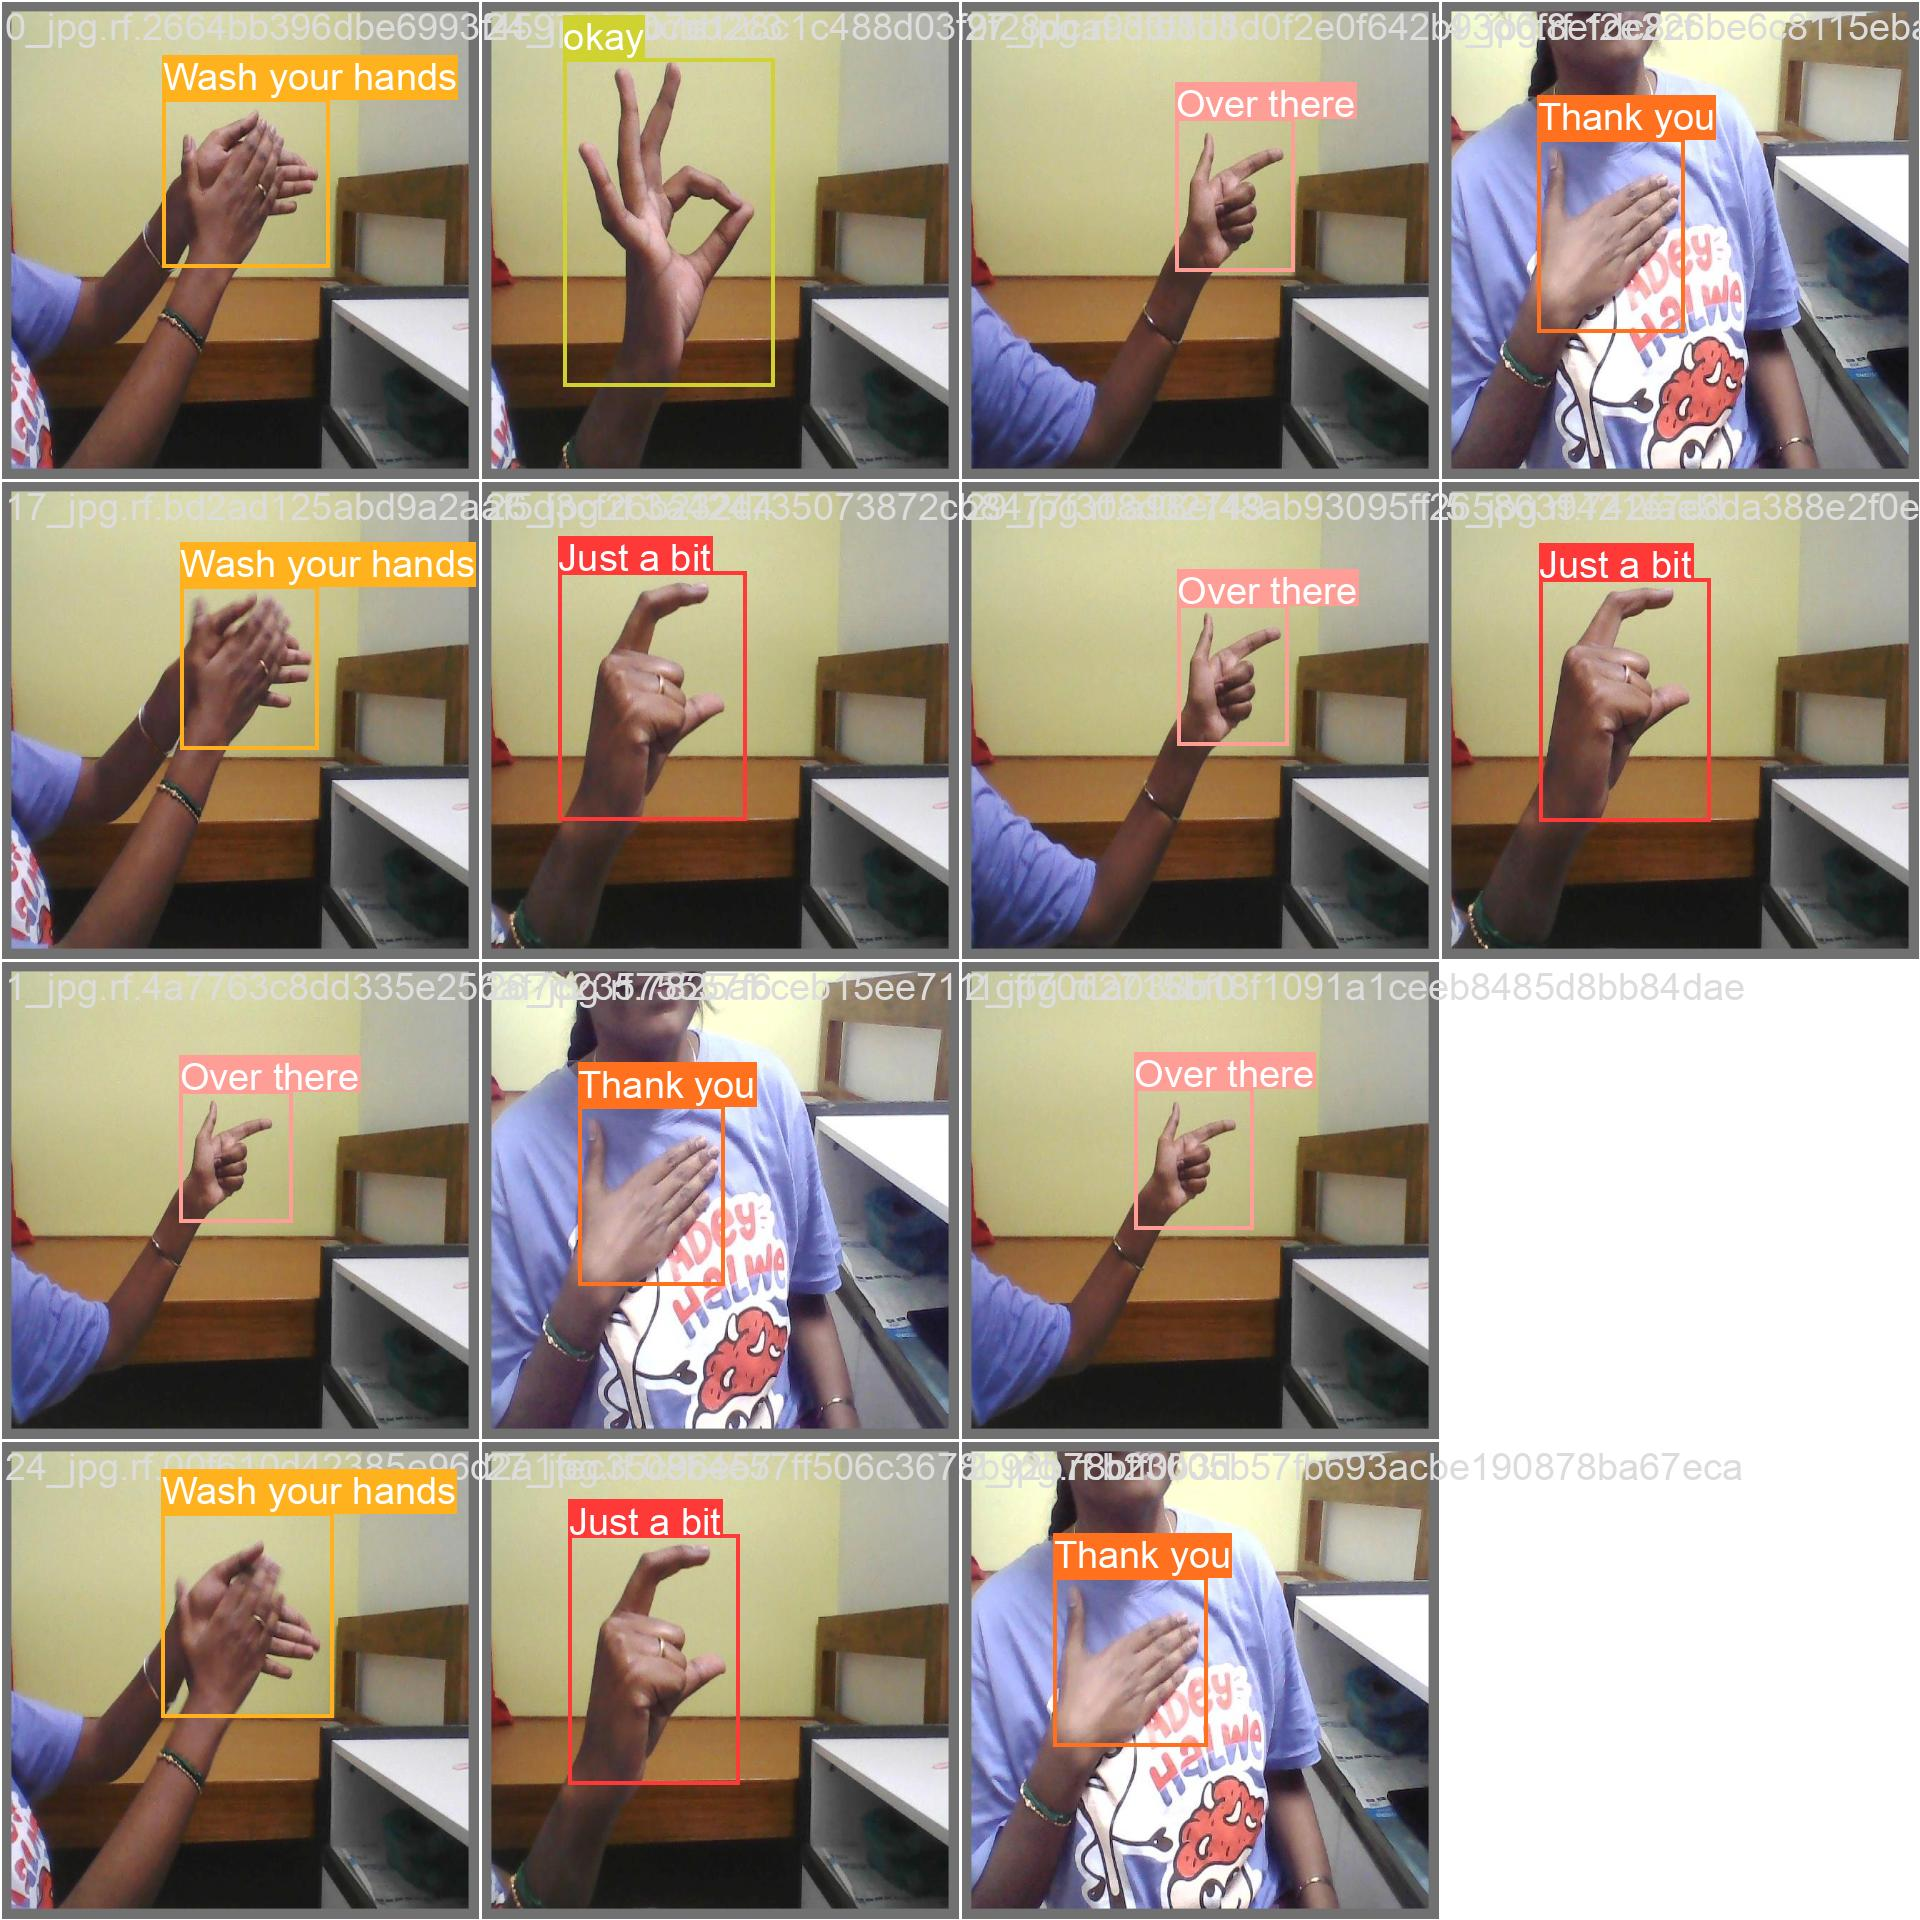

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg"
display(Image.open(image_path))


In [ ]:
%cd /content/yolov5/
!python detect.py --weights '/content/yolov5/runs/train/yolov5s_results4/weights/best.pt' --img 416 --conf 0.5 --source '/content/yolov5/test/images'

/content/yolov5
detect: weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7257306 parameters, 0 gradients
image 1/14 /content/test/images/0_jpg.rf.2664bb396dbe6993f45971040cbb2c35.jpg: 416x416 1 Wash your hands, 7.7ms
image 2/14 /content/test/images/17_jpg.rf.bd2ad125abd9a2aaf5d3cf26b232d4bb.jpg: 416x416 1 Wash your hands, 7.8ms
image 3/14 /content/test/images/1_jpg.rf.4a7763c8